This code is exploring the construction of a bimodal (two-Gaussian) pdf

In [1]:
# Generic imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
import scipy.interpolate as scpy
import scipy.optimize as optimization

In [2]:
# Local imports
import sys
sys.path.append('../')
import statstuff as sts
from statstuff import pWeibull, sigma2meanr

In [3]:
# Graphics
%matplotlib notebook
# %matplotlib inline

<IPython.core.display.Javascript object>


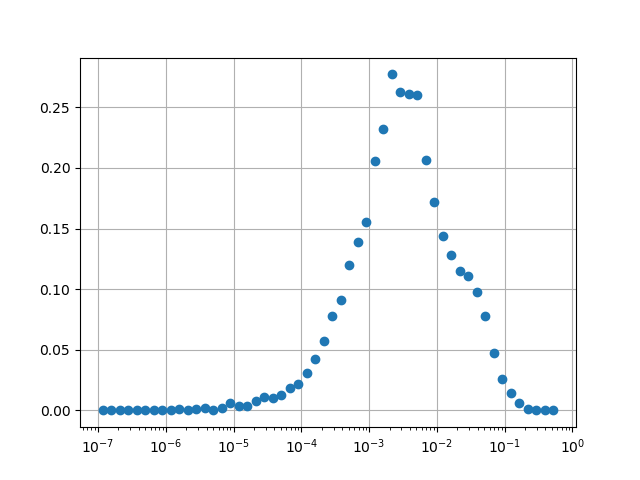

0.9999999999999998


In [4]:
#TRYING THE BIMODAL FIT WITH A WEIGHTED VARIABLE
#practice to fitting points to a Weibull function
# r = np.geomspace(1e-6,.99,40)
# pdf1 = pWeibull(r,0.2,1.0)*r
# pdf2 = pWeibull(r,0.7,1.0)*r
# N= 0.8
# y = (1-N)*pdf1+pdf2*N

dummy= np.loadtxt('roughness.txt')
r= dummy[0,:]
y= dummy[1,:]

#Do you want to save the bimodal fit created?
Iwanttosave = True

#plot scattered points
plt.figure()
plt.semilogx(r,y,'o')
plt.grid(True)

#check for normalization 
norm = -np.trapz(np.log(r),y); print(norm)

In [5]:
def bimodalfunc(r, sigma1, sigma2, N):
    pdf1 = pWeibull(r,sigma1,1.0)*r
    pdf2 = pWeibull(r,sigma2,1.0)*r
    return (1-N)*pdf1 + N*pdf2 

In [6]:
x0 = np.array([0.5,0.8, 0.1])
solution, solutionerror = optimization.curve_fit(bimodalfunc, r, y, x0)
best_sigma1 = solution[0]; print('best sigma1 =',best_sigma1)
best_sigma2 = solution[1]; print('best sigma2 =',best_sigma2)
best_N = solution[2]; print(best_N)
print('solution error =',solutionerror)

best sigma1 = 0.0744898835755891
best sigma2 = 0.21947405833214628
0.32659767756454733
solution error = [[ 4.76345237e-07  1.50532106e-06 -3.06064859e-06]
 [ 1.50532106e-06  1.66941280e-05 -1.82838693e-05]
 [-3.06064859e-06 -1.82838693e-05  6.34275270e-05]]


<IPython.core.display.Javascript object>


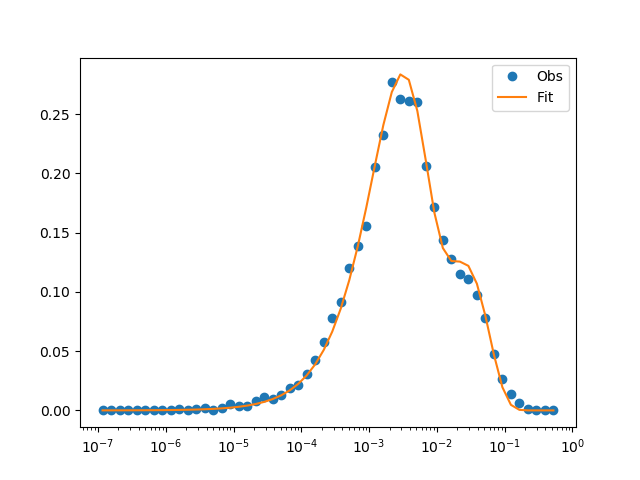

R_squar =  0.9944991745203936


In [7]:
# Testing our found sigma value with an eta of 1.0
yfit = bimodalfunc(r, best_sigma1, best_sigma2, best_N)
plt.figure()
plt.semilogx(r,y,'o',label='Obs')
plt.semilogx(r,yfit, label='Fit')
plt.legend()

#Getting RSquar
SS_res = np.sum((y-yfit)**2)
SS_tot = np.sum((y-np.mean(y))**2)
R_squar = 1-SS_res/SS_tot
print('R_squar = ',R_squar)

In [8]:
print('best sigma1 =',best_sigma1)
print('best sigma2 =',best_sigma2)
best_zsquar1= best_sigma1**2
best_zsquar2= best_sigma2**2
r1 = sigma2meanr(best_sigma1); print("r1 ",r1)
r2 = sigma2meanr(best_sigma2); print("r2 ",r2)
cost1=1-r1
cost2=1-r2
t1=np.arccos(cost1)*180/np.pi; print("t1", t1)
t2=np.arccos(cost2)*180/np.pi; print('t2', t2)

best sigma1 = 0.0744898835755891
best sigma2 = 0.21947405833214628
r1  0.0027515336184271858
r2  0.022524581666190566
t1 4.2513285916471375
t2 12.183850919226828


In [9]:
#Update with file name of the crystal
if Iwanttosave:
    plt.savefig('bimodalfit.png')   # save the figure to file
    cfile = open('bimodalfit.txt','w')
    cfile.write('&Bimodal_fit\n')
    cfile.write('2016-06-30-ice1 Case1.2.1'+'\n')
    cfile.write('   '+'sigma1 =' +str(best_sigma1)+'\n')
    cfile.write('   '+'sigma2 =' +str(best_sigma2)+'\n')
    cfile.write('   '+'weight(N) =' +str(best_N)+'\n')
    cfile.write('   '+'theta1 =' +str(t1)+'\n')
    cfile.write('   '+'theta2 =' +str(t2)+'\n')
    cfile.write('   '+'R_squar ='+str(R_squar)+'\n')
    cfile.close()

best_sigma =  0.09565451139391086
best_eta =  0.6645971104481228


<IPython.core.display.Javascript object>


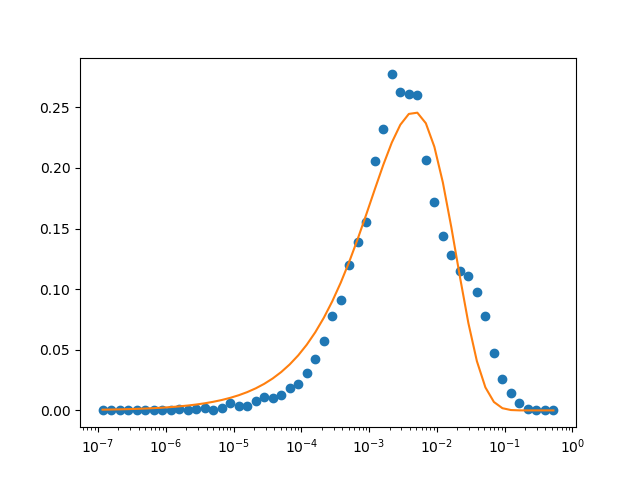

R_squar =  0.9335775799861068


In [10]:
#Trying to do a Weibull best fit
def pWeibullr(r, sigma, eta):
    return pWeibull(r, sigma, eta)*r
x0 = np.array([0.5,1.0])
solution, solutionerror = optimization.curve_fit(pWeibullr, r, y, x0)
best_sigma = solution[0]; print('best_sigma = ', best_sigma)
best_eta = solution[1]; print('best_eta = ', best_eta)
yfit = pWeibullr(r,best_sigma, best_eta)

#plot Weibull fit
plt.figure()
plt.semilogx(r,y, 'o')
plt.semilogx(r,yfit)

#Getting RSquar
SS_res = np.sum((y-yfit)**2)
SS_tot = np.sum((y-np.mean(y))**2)
R_squar = 1-SS_res/SS_tot
print('R_squar = ',R_squar)